## Comme dans tout protocole de recherche, ce premier notebook consiste à reproduire les éléments publiés par les auteurs afin de (1) vérifier que nous obtenons les mêmes résultats (2) nous approprier correctement leur méthodologie. 

In [6]:
import keras
import h5py
import PIL.Image
import os, shutil
from keras.models import load_model
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from keras.regularizers import l2

In [25]:
#changement de répertoire
os.chdir("C:/MLDL")

In [26]:
model = load_model('tomnod_everything_relu_adam.h5')#import du seul modèle mis en ligne sur le GitHub de Daniel Cao

In [34]:
train_damage_dir = "C:/MLDL/train_another/damage"
validation_damage_dir = "C:/MLDL/validation_another/damage"
test_damage_dir = "C:/MLDL/test/damage"
train_nodamage_dir = "C:/MLDL/train_another/no_damage"
validation_nodamage_dir = "C:/MLDL/validation_another/no_damage"
test_nodamage_dir = "C:/MLDL/test/no_damage"

In [35]:
print('total training damage images: ',len(os.listdir(train_damage_dir)))
print('total validation damage images: ',len(os.listdir(validation_damage_dir)))
print('total test damage images: ',len(os.listdir(test_damage_dir)))

print('total training no damage images: ',len(os.listdir(train_nodamage_dir)))
print('total validation no damage images: ',len(os.listdir(validation_nodamage_dir)))
print('total test no damage images: ',len(os.listdir(test_nodamage_dir)))

total training damage images:  5000
total validation damage images:  1000
total test damage images:  1000
total training no damage images:  5000
total validation no damage images:  1000
total test no damage images:  1000


In [36]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [38]:
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

C:\Users\chrys\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [40]:
#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#normalize the image pixel value to be between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                    "C:/MLDL/train_another", 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    "C:/MLDL/validation_another",
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [41]:
#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=50)

C:\Users\chrys\AppData\Local\Temp\ipykernel_5440\3885924556.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
100/100 [==============================] - 70s 681ms/step - loss: 0.6386 - acc: 0.5920 - val_loss: 0.5652 - val_acc: 0.7480
Epoch 2/50
100/100 [==============================] - 65s 653ms/step - loss: 0.5602 - acc: 0.7385 - val_loss: 0.4780 - val_acc: 0.7980
Epoch 3/50
100/100 [==============================] - 65s 646ms/step - loss: 0.4737 - acc: 0.8010 - val_loss: 0.4064 - val_acc: 0.8460
Epoch 4/50
100/100 [==============================] - 64s 638ms/step - loss: 0.4453 - acc: 0.8205 - val_loss: 0.3890 - val_acc: 0.8510
Epoch 5/50
100/100 [==============================] - 64s 642ms/step - loss: 0.4155 - acc: 0.8395 - val_loss: 0.3472 - val_acc: 0.8810
Epoch 6/50
100/100 [==============================] - 65s 651ms/step - loss: 0.3627 - acc: 0.8495 - val_loss: 0.3134 - val_acc: 0.8840
Epoch 7/50
100/100 [==============================] - 65s 646ms/step - loss: 0.3301 - acc: 0.8750 - val_loss: 0.2935 - val_acc: 0.8790
Epoch 8/50
100/100 [==============================] - 6

In [42]:
#it is generally a good practice to save the model after training
model.save('tomnod_1.h5')

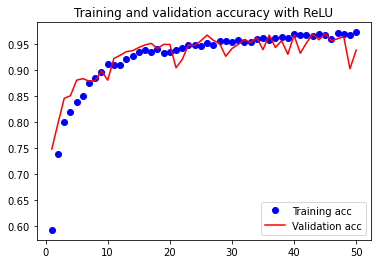

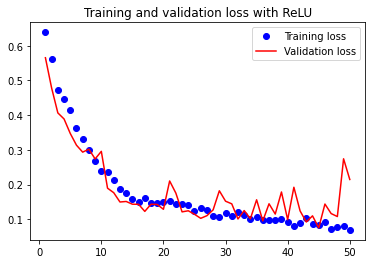

In [43]:
#plot loss and accuracy for detection overfitting (30 epochs) 
#les auteurs en parlent mais ils n'ont pas mis dans le notebook le modèle avec 30 epochs (ils ont mis le 50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [44]:
#it is generally a good practice to save the model after training
model.save('tomnod_1_50epochs.h5')

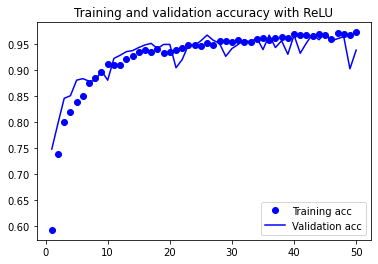

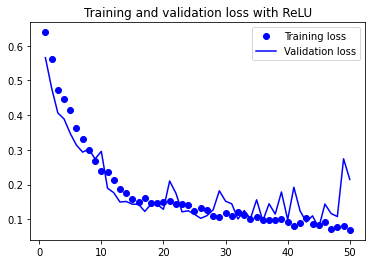

In [45]:
#plot loss and accuracy for detection overfitting (50 epochs)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy with ReLU')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss with ReLU')
plt.legend()

plt.show()

In [46]:
#the accuracy stalls at about 95.5% and we start seeing overfitting #oui, c'est ce qui c'est reproduit 
#cf. 1er graphique au-dessus
#we perform data augmentation
#to fight overfitting, we add a Dropout layer right before 
#the densely connected layer
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.RMSprop(lr = 1e-4),
                 metrics = ['acc'])

In [47]:
#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
train_generator = train_datagen.flow_from_directory(
                    "C:/MLDL/train_another", 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    "C:/MLDL/validation_another", 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


C:\Users\chrys\AppData\Local\Temp\ipykernel_5440\3238633250.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 94s 919ms/step - loss: 0.6533 - acc: 0.6281 - val_loss: 0.5799 - val_acc: 0.6888
Epoch 2/100
100/100 [==============================] - 92s 917ms/step - loss: 0.5764 - acc: 0.7175 - val_loss: 0.5144 - val_acc: 0.7569
Epoch 3/100
100/100 [==============================] - 93s 926ms/step - loss: 0.5376 - acc: 0.7506 - val_loss: 0.4718 - val_acc: 0.7837
Epoch 4/100
100/100 [==============================] - 94s 938ms/step - loss: 0.5027 - acc: 0.7734 - val_loss: 0.4801 - val_acc: 0.7919
Epoch 5/100
100/100 [==============================] - 97s 965ms/step - loss: 0.4777 - acc: 0.7883 - val_loss: 0.3991 - val_acc: 0.8331
Epoch 6/100
100/100 [==============================] - 97s 968ms/step - loss: 0.4464 - acc: 0.7959 - val_loss: 0.3648 - val_acc: 0.8562
Epoch 7/100
100/100 [==============================] - 97s 966ms/step - loss: 0.4007 - acc: 0.8294 - val_loss: 0.3255 - val_acc: 0.8612
Epoch 8/100
100/100 [===========================

In [48]:
#it is generally a good practice to save the model after training
model.save('tomnod_2_100epochs.h5')

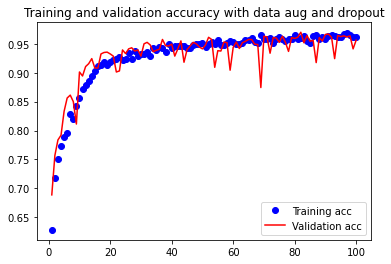

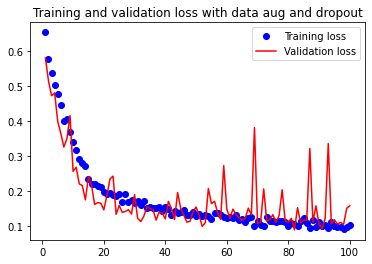

In [49]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with data aug and dropout')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with data aug and dropout')
plt.legend()

plt.show()

In [50]:
#validation accuracy can go up to 97.44%

In [ ]:
#cellule non activée

#try again with Adam optimizer
#model = models.Sequential()
#model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(512,activation = 'relu'))
#model.add(layers.Dense(1, activation = 'sigmoid'))

#model.compile(loss = 'binary_crossentropy',
                optimizer = optimizers.Adam(),
                 metrics = ['acc'])

#train using data augmentation and dropout
#train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
#test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented
#train_generator = train_datagen.flow_from_directory(
                    "C:/MLDL/train_another", 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#validation_generator = test_datagen.flow_from_directory(
                    "C:/MLDL/validation_another", 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
#train the model with fit_generator
#history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_data = validation_generator,
            validation_steps = 50)

In [ ]:
#model.save('tomnod_2_100epochs_Adam.h5')

In [ ]:
#plot loss and accuracy for detection overfitting
#import matplotlib.pyplot as plt
#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1,len(acc)+1)
#plt.plot(epochs, acc, 'bo', label = 'Training acc')
#plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
#plt.title('Training and validation accuracy with data aug and dropout (Adam)')
#plt.legend()

#plt.figure()
#plt.plot(epochs, loss, 'bo', label = 'Training loss')
#plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.title('Training and validation loss with data aug and dropout (Adam)')
#plt.legend()

#plt.show()

In [51]:
#to visualize the intermediate activation
from keras.models import load_model

In [52]:
#il s'agit du premier modèle généré avec 50 epochs et l'Optimiser RMSprop
model1 = load_model('tomnod_1.h5')
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)     

In [68]:
from tensorflow.keras.utils import load_img
from keras.preprocessing import image
import tensorflow as ts

In [70]:
#img_path = '/home/ubuntu/damage/-96.960704_28.783292.jpeg'# le dossier damage n'est pas dans le dossier Post_hurricane.zip 
#Nous prenons la première image du fichier train_another
#car peu importe, il s'agit ici de montrer la définition de l'image à chaque couche d
img_path = "C:/MLDL/train_another/damage/-93.6141_30.754263.jpeg"
from tensorflow.keras.utils import load_img
import numpy as np

img = ts.keras.utils.load_img(img_path, target_size = (150,150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


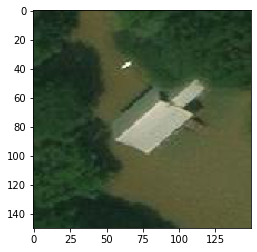

In [71]:
plt.imshow(img_tensor[0])
plt.show()

In [72]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

1/1 [==============================] - 0s 416ms/step


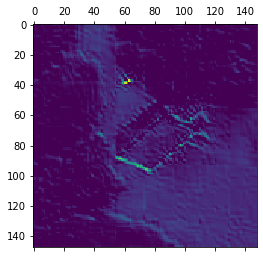

In [73]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4],cmap = 'viridis')

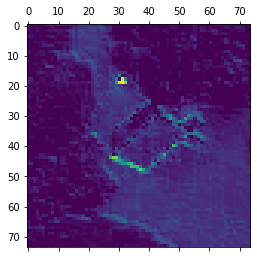

In [74]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0,:,:,4],cmap = 'viridis')

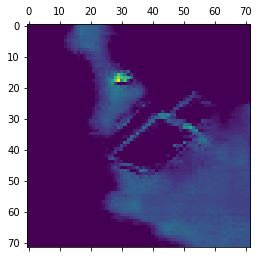

In [75]:
third_layer_activation = activations[2]
plt.matshow(third_layer_activation[0,:,:,4],cmap = 'viridis')

C:\Users\chrys\AppData\Local\Temp\ipykernel_5440\1119252562.py:15: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


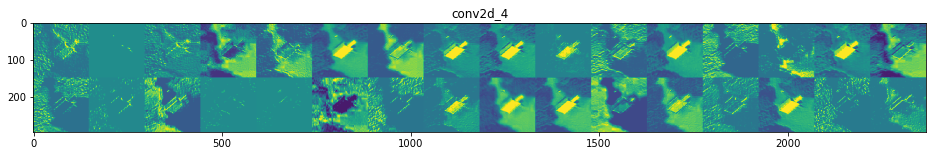

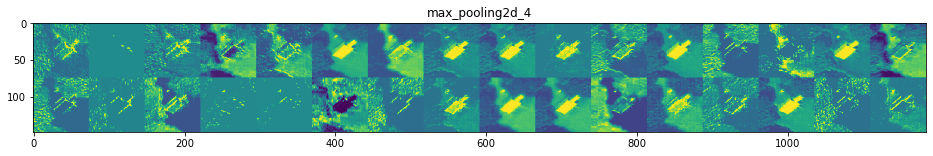

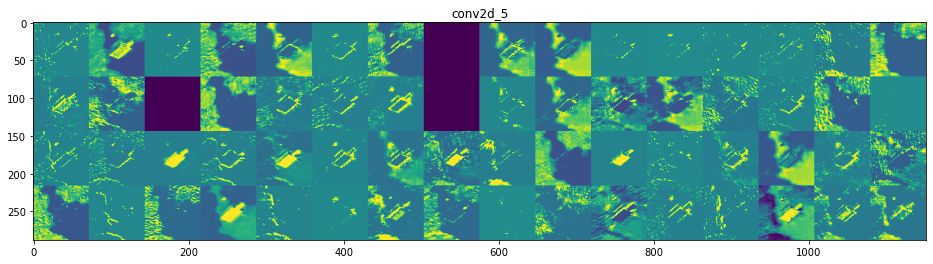

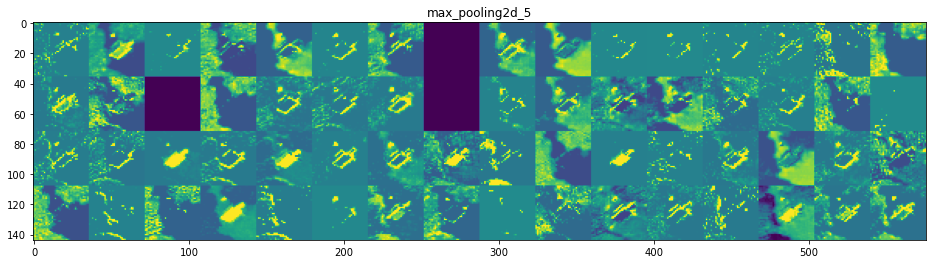

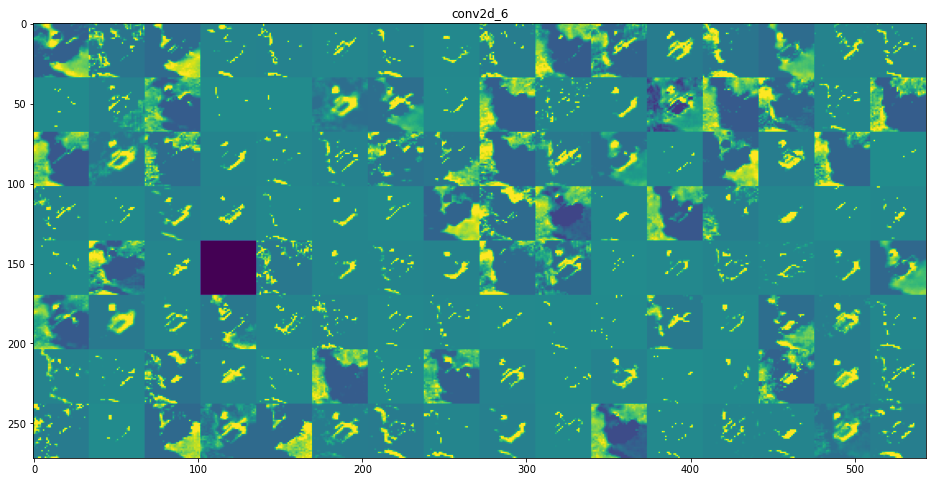

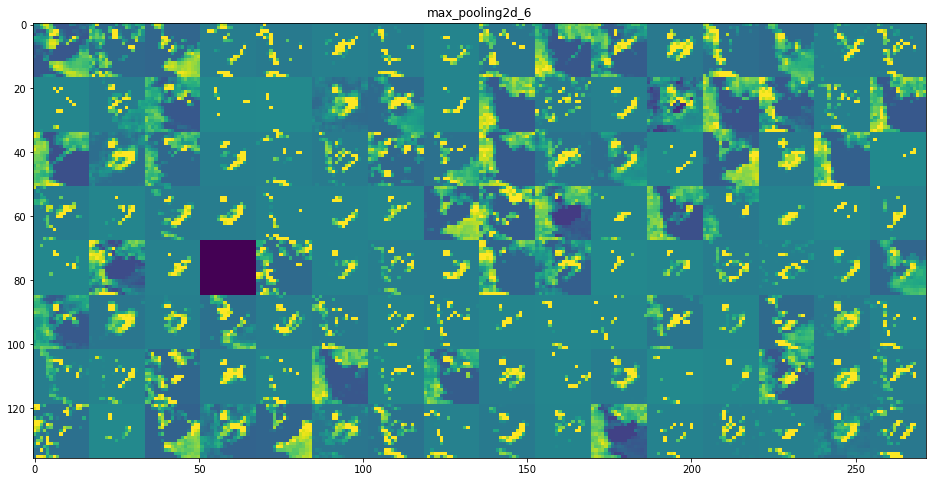

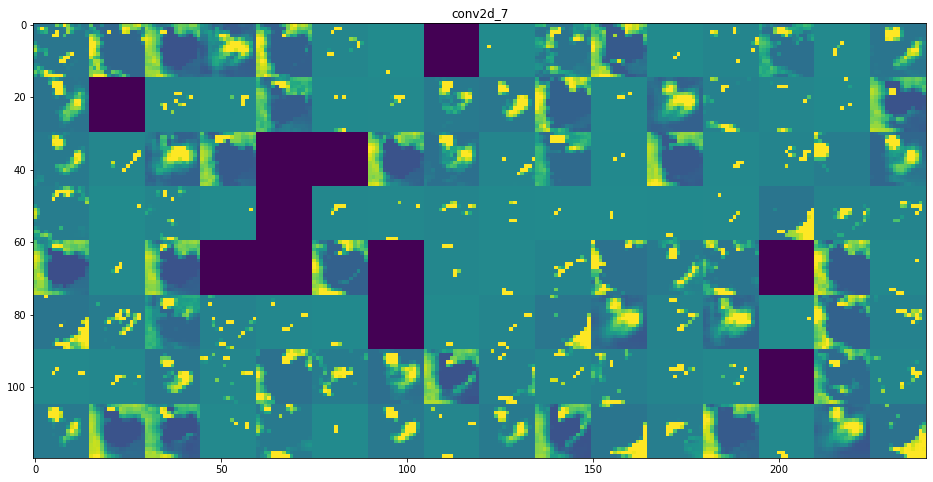

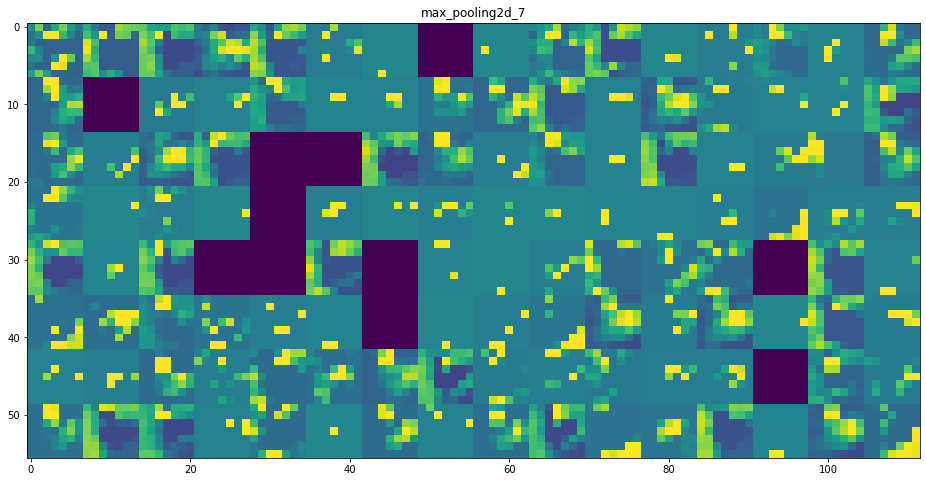

In [76]:
layer_names =[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

In [77]:
plt.savefig('informationFlow-relu.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
#cellule non activée
#let's build a model with leaky ReLU
#from keras.layers import LeakyReLU
#from keras.regularizers import l2
#model_l = models.Sequential()
#model_l.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
#model_l.add(LeakyReLU(alpha=0.1))
#model_l.add(layers.MaxPooling2D((2,2)))
##model_l.add(Dropout(0.25))#non activé par les auteurs

#model_l.add(layers.Conv2D(64,(3,3)))
#model_l.add(LeakyReLU(alpha=0.1))
#model_l.add(layers.MaxPooling2D((2,2)))
##model_l.add(Dropout(0.25))#non activé par les auteurs

#model_l.add(layers.Conv2D(128,(3,3)))
#model_l.add(LeakyReLU(alpha=0.1))
#model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

#model_l.add(layers.Conv2D(128,(3,3)))
#model_l.add(LeakyReLU(alpha=0.1))
#model_l.add(layers.MaxPooling2D((2,2)))
#model_l.add(Dropout(0.25))

#model_l.add(layers.Flatten())
#model_l.add(layers.Dense(512,W_regularizer = l2(1e-6)))
#model_l.add(LeakyReLU(alpha=0.1))
#model_l.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
#model_l.summary()

In [ ]:
#compile the model with RMSprob with learning rate
#from keras import optimizers
#model_l.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
#from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)

#train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train', 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
#validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation',
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

#fit the model from image generator
#history = model_l.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

In [ ]:
#it is generally a good practice to save the model after training
#model_l.save('tomnod_leaky_30epochs.h5')

In [ ]:
plt.savefig('informationFlow-leaky.png')

In [78]:
#try transfer learning
#using feature extraction from ImageNet VGG16
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet',
                    include_top = False, #no dense layers
                    input_shape = (150,150,3))
conv_base.summary()

58889256/58889256 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [79]:
#Method 1: Fast feature extraction without data augmentation
#Run the conv_base on the dataset and save as Numpy array on disk
#Then build the dense layer on this
#This is faster to run, but we cannot augment the data
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

train_dir = "C:/MLDL/train_another"
validation_dir = "C:/MLDL/validation_another"
test_dir = "C:/MLDL/test"

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [80]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(
                    directory, 
                    target_size = (150,150),
                    batch_size = batch_size,
                    class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count: #generators yield data indefinitely
            break                          #have to break after we have seen every image once
    return features, labels

In [81]:
train_features, train_labels = extract_features(train_dir, 10000) #10 000 /2 000 /2 000 extraites OK
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 2000)
#the extracted features are of shape (sample_count, 4, 4, 512), we must flatten them to (sample_count, 8192)
train_features = np.reshape(train_features, (10000, 4*4*512))
validation_features = np.reshape(validation_features, (2000, 4*4*512))
test_features = np.reshape(test_features, (2000, 4*4*512))

Found 10000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 2s 2s/step


In [82]:
#define the densely connected layer
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr = 2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(train_features, train_labels, 
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

Epoch 1/30
500/500 [==============================] - 17s 32ms/step - loss: 0.3753 - acc: 0.8373 - val_loss: 0.2635 - val_acc: 0.8915
Epoch 2/30
500/500 [==============================] - 16s 31ms/step - loss: 0.2637 - acc: 0.8922 - val_loss: 0.2316 - val_acc: 0.9095
Epoch 3/30
500/500 [==============================] - 16s 31ms/step - loss: 0.2374 - acc: 0.9021 - val_loss: 0.2175 - val_acc: 0.9135
Epoch 4/30
500/500 [==============================] - 16s 32ms/step - loss: 0.2230 - acc: 0.9083 - val_loss: 0.2155 - val_acc: 0.9115
Epoch 5/30
500/500 [==============================] - 16s 31ms/step - loss: 0.2112 - acc: 0.9137 - val_loss: 0.2052 - val_acc: 0.9155
Epoch 6/30
500/500 [==============================] - 16s 31ms/step - loss: 0.2037 - acc: 0.9147 - val_loss: 0.2027 - val_acc: 0.9170
Epoch 7/30
500/500 [==============================] - 16s 31ms/step - loss: 0.1987 - acc: 0.9211 - val_loss: 0.2055 - val_acc: 0.9195
Epoch 8/30
500/500 [==============================] - 16s 31ms

In [83]:
#save the model with pretrained features in Numpy array (no data augmentation)
model.save('tomnod_transfer_1.h5')

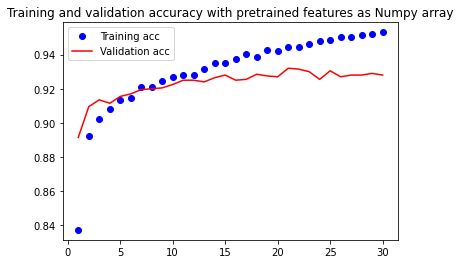

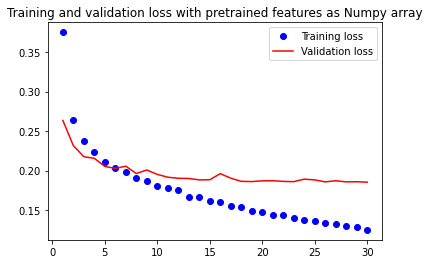

In [84]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with pretrained features as Numpy array')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with pretrained features as Numpy array')
plt.legend()

plt.show()

In [ ]:
# we see that the feature extraction is good but we start overfitting almost in the first few epochs.

In [85]:
#feature extraction with data augmentation and dropout
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [86]:
conv_base.trainable = False #freeze the convolutional base network
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                    "C:/MLDL/train_another",
                    target_size=(150,150),
                    batch_size = 20,
                    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
                    "C:/MLDL/validation_another",
                    target_size=(150,150),
                    batch_size = 20,
                    class_mode = 'binary')

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch = 100,
            epochs = 30,
            validation_data = validation_generator,
            validation_steps = 50)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


C:\Users\chrys\AppData\Local\Temp\ipykernel_5440\3172719419.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 330s 3s/step - loss: 0.4949 - acc: 0.7925 - val_loss: 0.3997 - val_acc: 0.8510
Epoch 2/30
100/100 [==============================] - 324s 3s/step - loss: 0.3902 - acc: 0.8365 - val_loss: 0.3682 - val_acc: 0.8710
Epoch 3/30
100/100 [==============================] - 323s 3s/step - loss: 0.3608 - acc: 0.8500 - val_loss: 0.3312 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 323s 3s/step - loss: 0.3372 - acc: 0.8575 - val_loss: 0.2908 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 323s 3s/step - loss: 0.3481 - acc: 0.8560 - val_loss: 0.3073 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 324s 3s/step - loss: 0.3238 - acc: 0.8625 - val_loss: 0.2720 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 322s 3s/step - loss: 0.3124 - acc: 0.8680 - val_loss: 0.3060 - val_acc: 0.8650
Epoch 8/30
100/100 [==============================] - 323s 3s/step - 

In [87]:
#save the model with transfer learning and data augmentation
model.save('tomnod_transfer_dataAugment.h5')

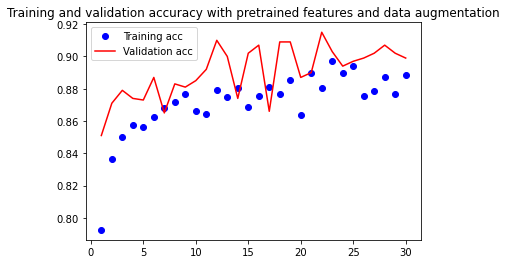

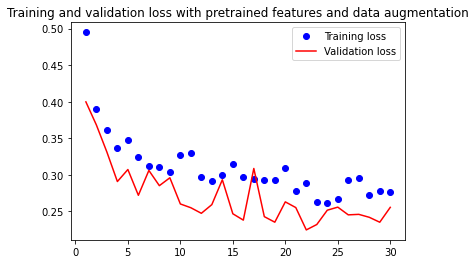

In [88]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with pretrained features and data augmentation')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with pretrained features and data augmentation')
plt.legend()

plt.show()

In [ ]:
#we still need a final, grand model

In [ ]:
#temp
#let's build a model with leaky ReLU
from keras.layers import LeakyReLU
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), input_shape = (150,150,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,W_regularizer = l2(1e-6)))
model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

In [ ]:
#save the champion model (leaky, full dropout, L2 regularization, data aug)
model.save('tomnod_everything.h5')

In [ ]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy with leaky, full dropout, L2 regularization, data aug')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss with leaky, full dropout, L2 regularization, data aug')
plt.legend()

plt.show()

In [ ]:
#write the code to compute test set accuracy
#process the jpeg image
#create an image generator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')

In [ ]:
# uncomment to get the respective model 
# model = load_model('tomnod_1.h5')
# model = load_model('tomnod_1_50epochs.h5')
# model = load_model('tomnod_2_100epochs.h5')
# model = load_model('tomnod_leaky_30epochs.h5')
# model = load_model('tomnod_transfer_dataAugment.h5')
# model = load_model('tomnod_everything.h5')
# model = load_model('tomnod_everything_relu.h5')
# model = load_model('tomnod_everything_relu_Adam.h5')
# model = load_model('tomnod_2_100epochs_Adam.h5')

test_results = model.evaluate_generator(test_generator)
test_results

In [ ]:
# the transfer learning model using Numpy array is different from the rest
model = load_model('tomnod_transfer_1.h5')
test_results = model.evaluate(test_features,test_labels)
test_results

In [ ]:
# a logistic regression using Numpy array features (after passing through convultional based)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C = 1)
logisticRegr.fit(train_features,train_labels)
#balanced test set 
score1 = logisticRegr.score(validation_features, validation_labels)
print("Validation acc = ", score1)

In [ ]:
#unbalanced test set 
score2 = logisticRegr.score(test_features, test_labels)
print("Test acc = ", score2)

In [ ]:
model = load_model('tomnod_2_100epochs.h5')

In [ ]:
from sklearn.metrics import roc_curve
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/test_another', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
y_pred = []
y_label = []
for i in range(450):
    x,y = test_generator.next()
    temp_y = model.predict(x)
    y.tolist()
    temp_y.tolist()
    y_pred.extend(temp_y)
    #print(temp_y)
    #print(y)
    #print('')
    y_label.extend(y)

In [ ]:
len(y_pred)

In [ ]:
len(y_label)

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_label, y_pred,pos_label=1)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
print(auc_keras)

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC area = {:.3f}'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of the best model with unbalanced test set')
plt.legend(loc='best')
plt.show()

In [ ]:
#see which image is misclassified
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/test', #change this for balanced/unbalanced test set 
                    target_size = (150,150),
                    batch_size = 20,
                    class_mode = 'binary')
y_pred = []
y_label = []
for i in range(50):
    x,y = test_generator.next()
    y = y.ravel()
    temp_y = model.predict(x)
    temp_y = np.round(temp_y.ravel())
    misclassification = np.absolute(y-temp_y)

    #show the misclassification
    misclass_index = np.where(misclassification > 0.5)
    for j in range(len(misclass_index[0])):
        plt.figure()
        #print(misclass_index[0][j])
        plt.title('label is {}, prediction is {}'.format(y[misclass_index[0][j]],temp_y[misclass_index[0][j]]))
        plt.imshow(image.array_to_img(x[misclass_index[0][j]]))
    misclass_index = None

In [ ]:
#to see how the generator encodes the images into binary or multiclass:
test_generator.class_indices

In [ ]:
test_generator.classes

In [ ]:
#another grand model with just relu
from keras.layers import LeakyReLU
from keras.regularizers import l2
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (150,150,3)))
# model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu',W_regularizer = l2(1e-4)))
#model.add(LeakyReLU(alpha=0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
#compile the model with RMSprob with learning rate
from keras import optimizers
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr=1e-4), metrics = ['acc'])

#process the jpeg image
#create an image generator
from keras.preprocessing.image import ImageDataGenerator

#train using data augmentation and dropout
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
                    '/home/ubuntu/train', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
                    '/home/ubuntu/validation', 
                    target_size = (150,150),
                    batch_size = 32,
                    class_mode = 'binary')

#fit the model from image generator
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=50)

In [ ]:
#save the champion model (leaky, full dropout, L2 regularization, data aug)
model.save('tomnod_everything_relu_Adam.h5')

In [ ]:
#plot loss and accuracy for detection overfitting
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Train and validation accuracy with Adam, ReLU, full dropout, L2 regularization, data aug')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Train and validation loss with Adam, ReLU, full dropout, L2 regularization, data aug')
plt.legend()

plt.show()

In [ ]:
model = load_model('tomnod_2_100epochs_Adam.h5')

In [ ]:
model.summary()